C:\Users\Gonza\AppData\Local\Temp\ipykernel_2316\2304081498.py:13: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  iteration10['Timestamp'] = pd.to_datetime(iteration10['Timestamp']).dt.floor('S')


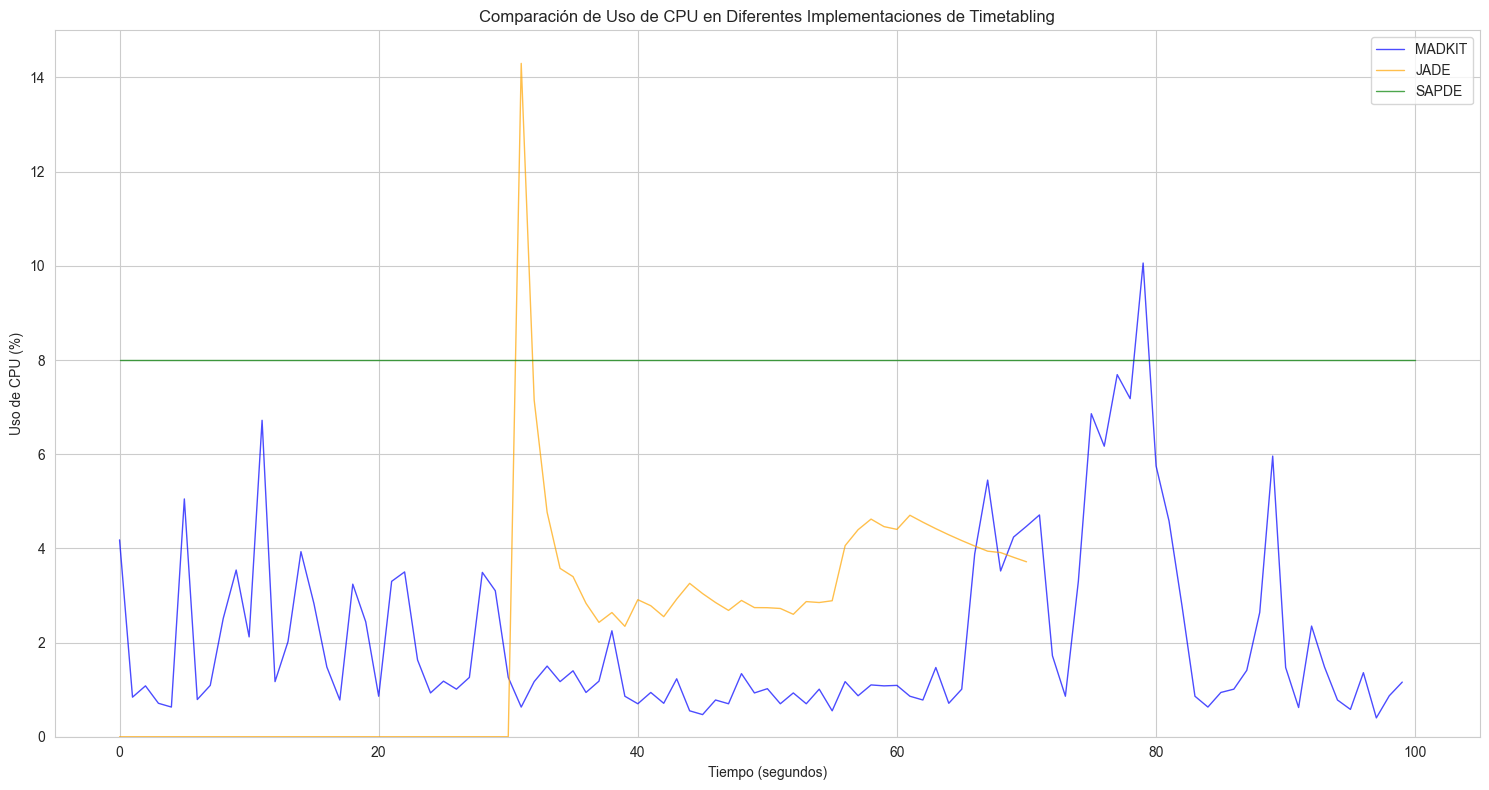


Estadísticas de uso de CPU:

SAPDE:
CPU Usage constante: 16 %

JADE:
count    71.000000
mean      2.144177
std       2.394836
min       0.000000
25%       0.000000
50%       2.637500
75%       3.645000
max      14.300000
Name: cpu_avg, dtype: float64

MADKIT:
count    100.000000
mean       2.109100
std        1.921894
min        0.400000
25%        0.860000
50%        1.175000
75%        2.897500
max       10.060000
Name: cpu_avg, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuración visual de seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 8]

# Leer y procesar Iteration10_cpu.csv (SAPDE)
iteration10 = pd.read_csv('Iteration10_cpu.csv')
# Redondear los timestamps a segundos para evitar la línea vertical
iteration10['Timestamp'] = pd.to_datetime(iteration10['Timestamp']).dt.floor('S')
start_time = iteration10['Timestamp'].min()
iteration10['seconds'] = (iteration10['Timestamp'] - start_time).dt.total_seconds()

# Extender los datos de SAPDE para que cubran todo el rango de tiempo
max_time = max(100, iteration10['seconds'].max())  # Asegurar al menos 100 segundos
extended_seconds = pd.Series(range(int(max_time) + 1))
iteration10_extended = pd.DataFrame({'seconds': extended_seconds})
iteration10_extended['CPUUsage'] = 8  # Valor constante observado

# Leer y procesar mas_metrics (JADE)
mas_metrics = pd.read_csv('mas_metrics_2025.csv')
mas_metrics['seconds'] = range(len(mas_metrics))

# Leer y procesar cpu_madkit (MADKIT)
cpu_madkit = pd.read_csv('cpu_madkit.csv')
cpu_madkit['seconds'] = cpu_madkit['sample_number'] - 1

# Crear el gráfico
plt.figure(figsize=(15, 8))

# Graficar cada dataset con los nuevos colores
plt.plot(cpu_madkit['seconds'], cpu_madkit['cpu_avg'], 
         label='MADKIT', alpha=0.7, color='blue', linewidth=1)
plt.plot(mas_metrics['seconds'], mas_metrics['cpu_avg'], 
         label='JADE', alpha=0.7, color='orange', linewidth=1)
plt.plot(iteration10_extended['seconds'], iteration10_extended['CPUUsage'], 
         label='SAPDE', alpha=0.7, color='green', linewidth=1)

# Configurar el gráfico
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Uso de CPU (%)')
plt.title('Comparación de Uso de CPU en Diferentes Implementaciones de Timetabling')
plt.legend()
plt.grid(True)

# Ajustar los límites del eje Y para mejor visualización
plt.ylim(0, 15)  # Ajustamos el límite superior a 15% para mejor visualización

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Imprimir estadísticas
print("\nEstadísticas de uso de CPU:")
print("\nSAPDE:")
print("CPU Usage constante:", iteration10['CPUUsage'].iloc[0], "%")
print("\nJADE:")
print(mas_metrics['cpu_avg'].describe())
print("\nMADKIT:")
print(cpu_madkit['cpu_avg'].describe())